In [118]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [119]:
birds = cv2.imread('/content/pexels-pixabay-45853.jpg')
hgt, wdt,_ = birds.shape

In [120]:
hgt, wdt

(3555, 5315)

## Display color formats

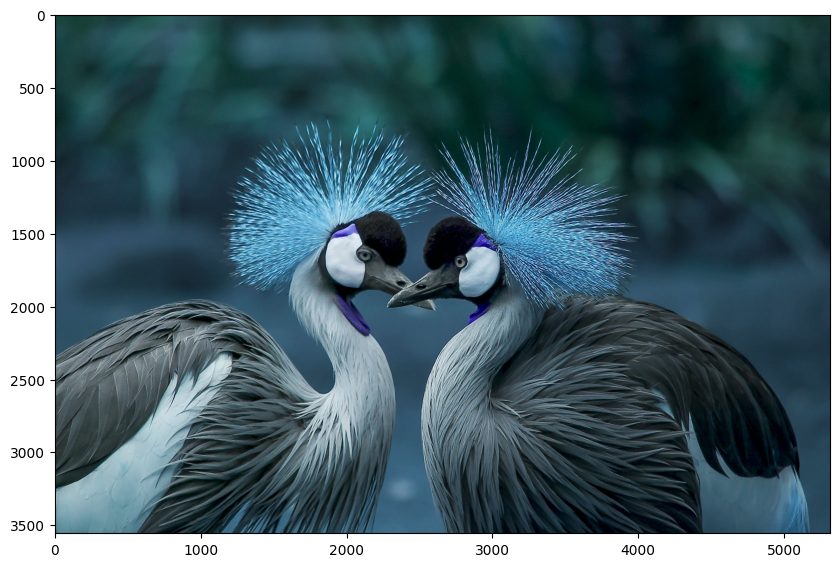

In [121]:
plt.figure(figsize=[10,7])
plt.imshow(birds)
plt.show()

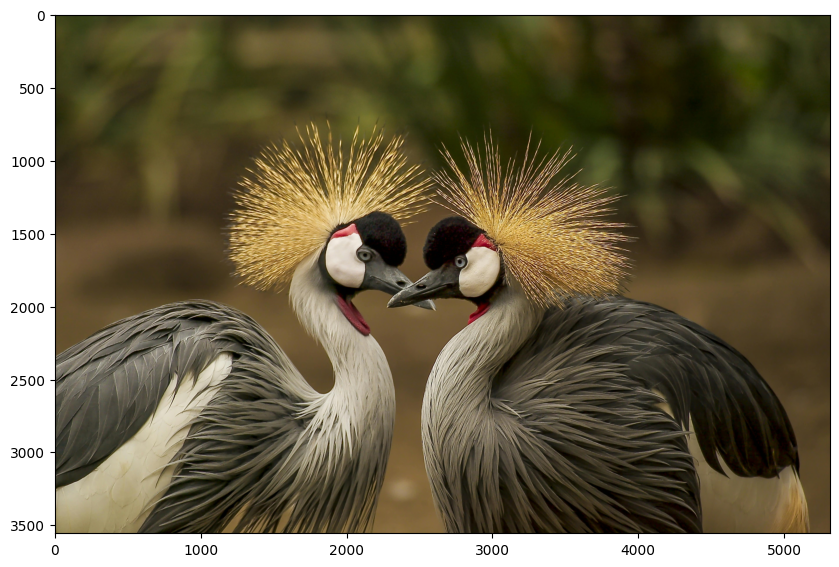

In [122]:
image = cv2.cvtColor(birds, cv2.COLOR_BGR2RGB)
plt.figure(figsize=[10,7])
plt.imshow(image)
plt.show()

## Edge detection

In [123]:
x_sobel = cv2.Sobel(birds, cv2.CV_64F, 0, 1, ksize=5)
y_sobel = cv2.Sobel(birds, cv2.CV_64F, 1, 0, ksize=5)

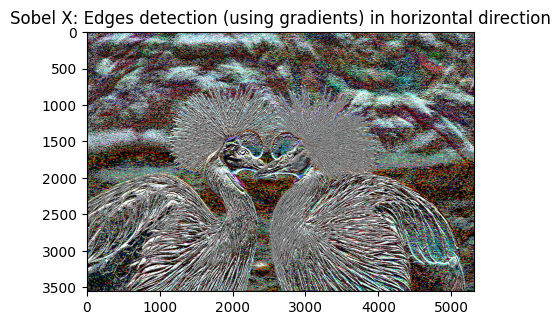

In [124]:
plt.figure(figsize=[5,5])
plt.title("Sobel X: Edges detection (using gradients) in horizontal direction")
plt.imshow(x_sobel)
plt.show()

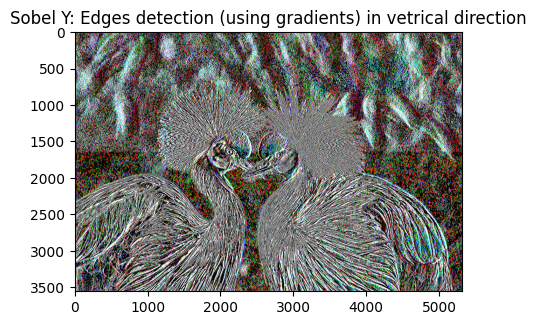

In [125]:
plt.figure(figsize=[5,5])
plt.title("Sobel Y: Edges detection (using gradients) in vetrical direction")
plt.imshow(y_sobel)
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


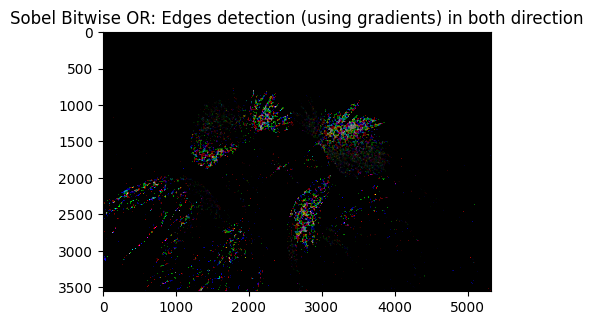

In [126]:
sobel_or = cv2.bitwise_or(x_sobel, y_sobel)
plt.figure(figsize=[5,5])
plt.title("Sobel Bitwise OR: Edges detection (using gradients) in both direction")
plt.imshow(sobel_or)
plt.show()

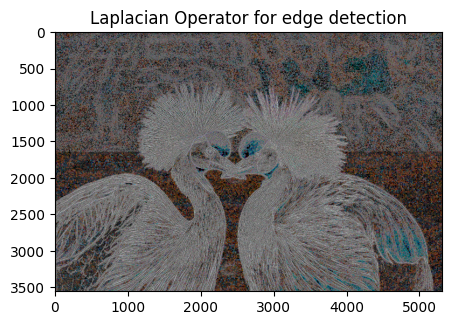

In [127]:
laplacian = cv2.Laplacian(birds, cv2.CV_64F)
plt.figure(figsize=[5,5])
plt.title("Laplacian Operator for edge detection")
plt.imshow(laplacian)
plt.show()

# # Wait for a key press
# k = cv2.waitKey(0)

# # Check if the 'Esc' key was pressed (ASCII value of 'Esc' key is 27)
# if k == 27:
#     cv2.destroyAllWindows()

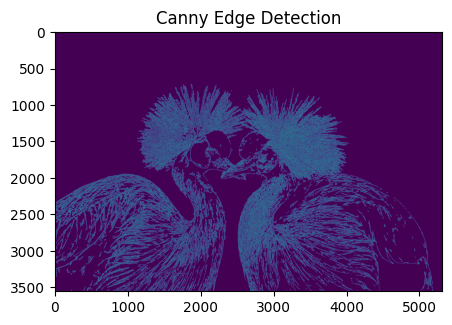

In [128]:
## There are two values: threshold1 and threshold2.
## Those gradients that are greater than threshold2 => considered as an edge
## Those gradients that are below threshold1 => considered not to be an edge.
## Those gradients Values that are in between threshold1 and threshold2 => either classiﬁed as edges or non-edges
# The first threshold gradient
canny = cv2.Canny(birds, 10, 100)
plt.figure(figsize=[5,5])
plt.title("Canny Edge Detection")
plt.imshow(canny)
plt.show()

## Morphological Operations

1. Erosion -> Erode foreground pixels -> to remove small white noises from the foreground
2. Dialation -> Dialate foreground pixels -> to join broken parts of an object or expand size of an object
3. Opening -> erosion followed by a dilation -> to remove small objects from the foreground while preserving larger objects
4. Closing -> dilation followed by an erosion -> to close small holes or gaps in the foreground while preserving larger objects

In [129]:
rect_image = cv2.imread("/content/rect.jpg")

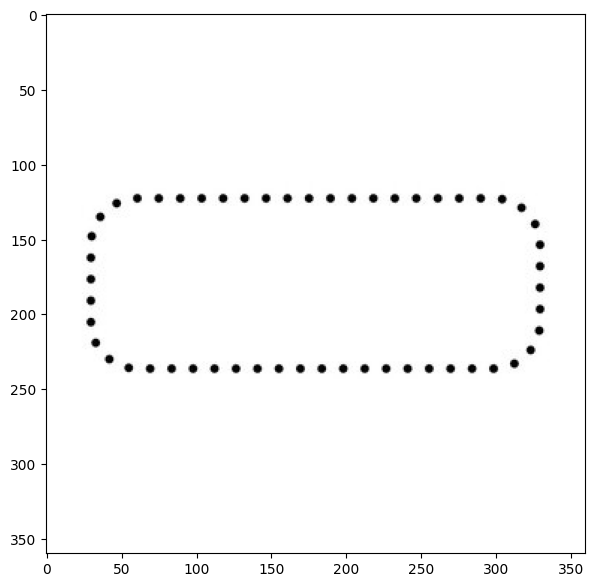

In [130]:
plt.figure(figsize=[10,7])
plt.imshow(rect_image)
plt.show()

In [131]:
# kernel of 5*5 ones
kernel = np.ones((5,5), np.uint8)

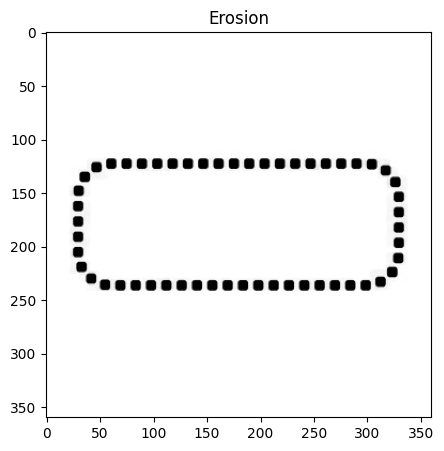

In [132]:
erosion = cv2.erode(rect_image, kernel, iterations = 1)
plt.figure(figsize=[5,5])
plt.title("Erosion")
plt.imshow(erosion)
plt.show()

White part got eroded because of which black part got bigger

In [133]:
# Split the image into channels
b, g, r = cv2.split(rect_image)

# Invert each channel
inverted_b = 255 - b
inverted_g = 255 - g
inverted_r = 255 - r

# Merge the inverted channels
inverted_rect = cv2.merge((inverted_b, inverted_g, inverted_r))

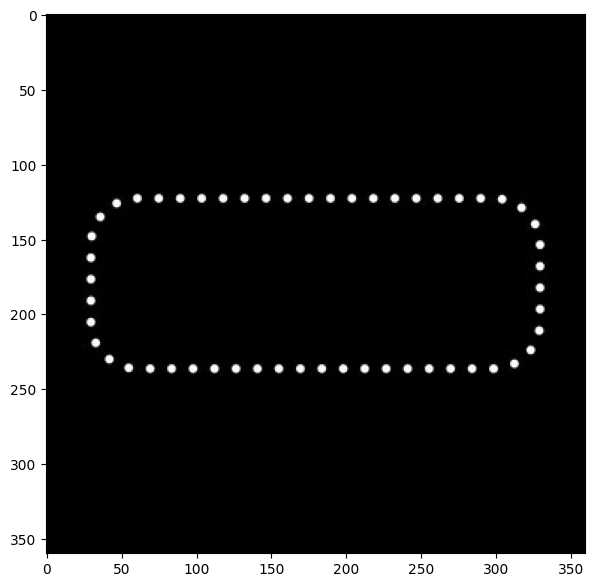

In [134]:
plt.figure(figsize=[10,7])
plt.imshow(inverted_rect)
plt.show()

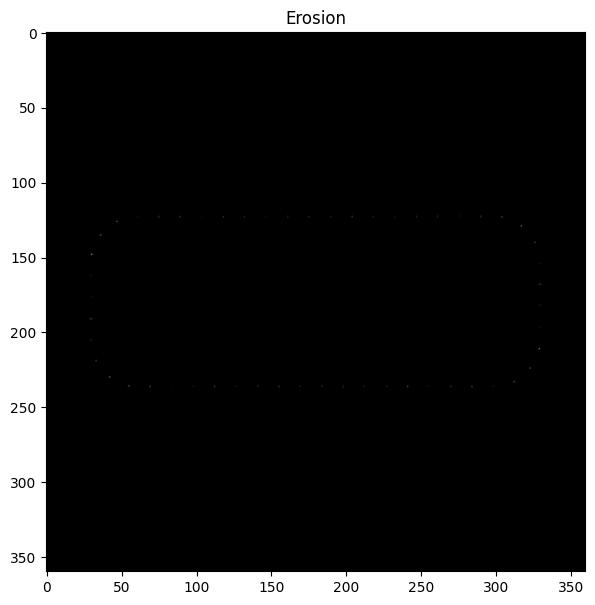

In [135]:
erosion = cv2.erode(inverted_rect, kernel, iterations = 1)
plt.figure(figsize=[10,7])
plt.title("Erosion")
plt.imshow(erosion)
plt.show()

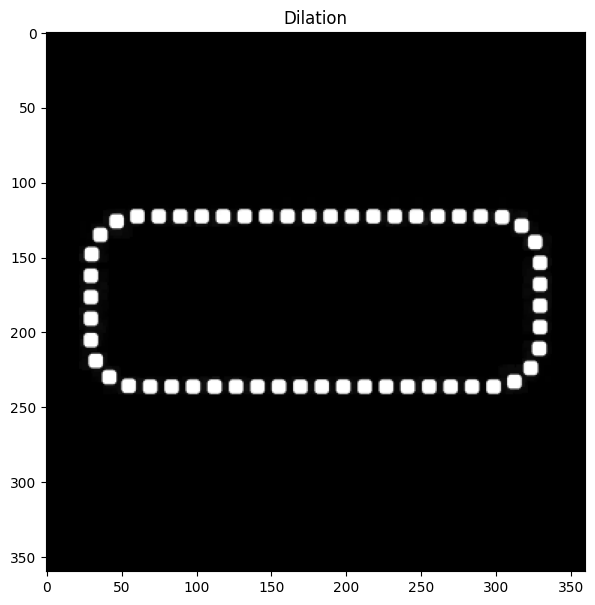

In [136]:
dilation = cv2.dilate(inverted_rect, kernel, iterations = 1)
plt.figure(figsize=[10,7])
plt.title("Dilation")
plt.imshow(dilation)
plt.show()

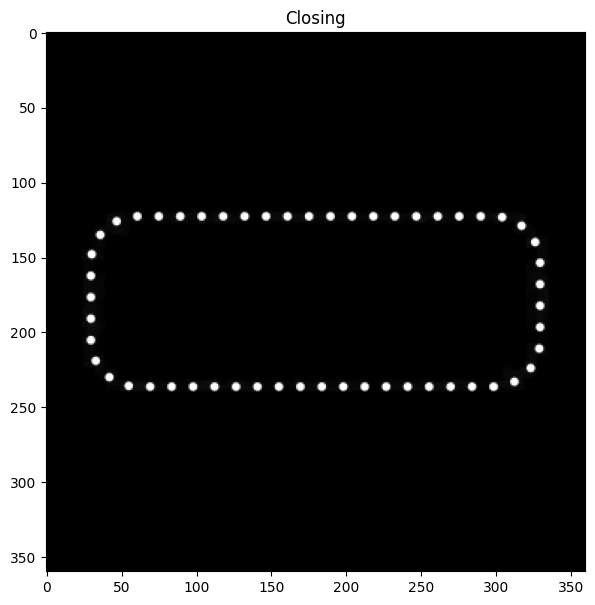

In [137]:
closing = cv2.morphologyEx(inverted_rect, cv2.MORPH_CLOSE, kernel)

plt.figure(figsize=[10,7])
plt.title("Closing")
plt.imshow(closing)
plt.show()

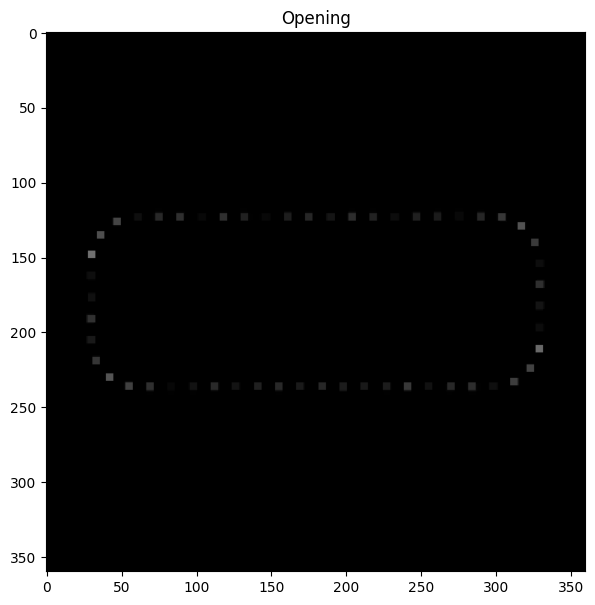

In [138]:
opening = cv2.morphologyEx(inverted_rect, cv2.MORPH_OPEN, kernel)

plt.figure(figsize=[10,7])
plt.title("Opening")
plt.imshow(opening)
plt.show()

## Perspective

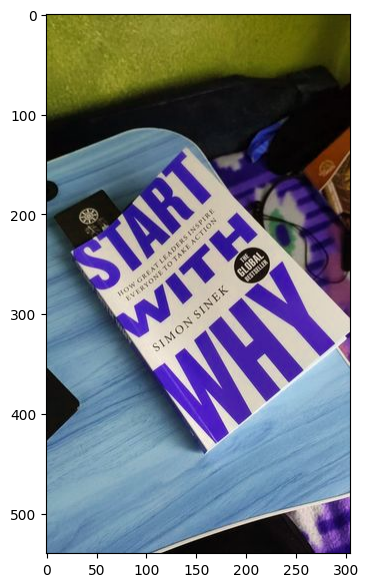

In [139]:
book = cv2.imread('/content/book.jpg')

plt.figure(figsize=[10,7])
plt.imshow(book)
plt.show()

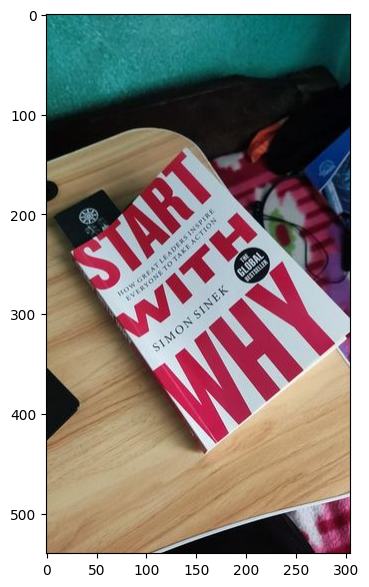

In [140]:
book = cv2.cvtColor(book, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10,7])
plt.imshow(book)
plt.show()

In [141]:
points_A = np.float32([[25,240],[143,133],[161,442],[302,321]]) # coordinates of book within the image
points_B = np.float32([[0,0],[200,0],[0,300],[200,300]]) # points to map book into after perspective warping

M = cv2.getPerspectiveTransform(points_A, points_B)
warped = cv2.warpPerspective(book, M, (200,300))

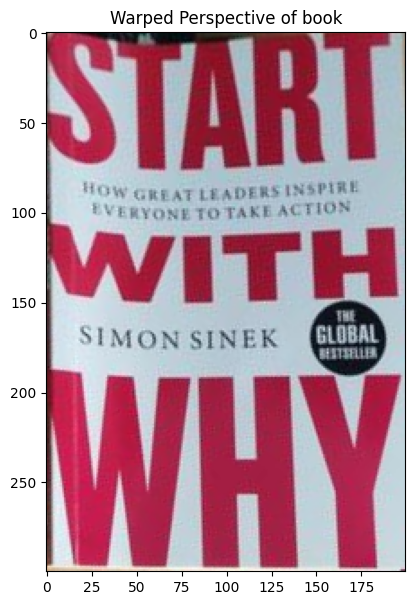

In [142]:
plt.figure(figsize=[10,7])
plt.title("Warped Perspective of book")
plt.imshow(warped)
plt.show()

## Image Pyramids

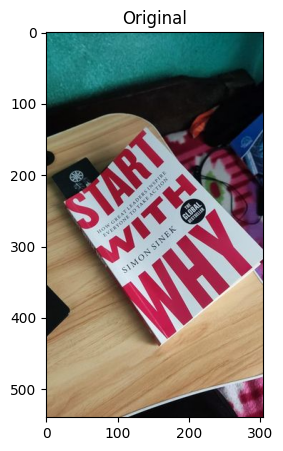

In [143]:
plt.figure(figsize=(10,5))
plt.title("Original")
plt.imshow(book)

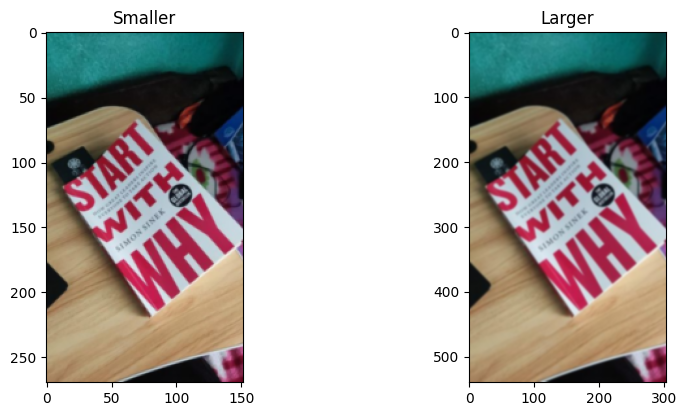

In [144]:
plt.figure(figsize=(10,10))

smaller = cv2.pyrDown(book)
larger = cv2.pyrUp(smaller)

plt.subplot(2, 2, 1)
plt.title("Smaller")
plt.imshow(smaller)

plt.subplot(2, 2, 2)
plt.title("Larger")
plt.imshow(larger)

## Cropping & Rotating

In [145]:
# image = cv2.imread('/content/messiRonaldo.jpg')
# plt.figure(figsize=(10,5))
# plt.title("Legends")
# plt.imshow(image)

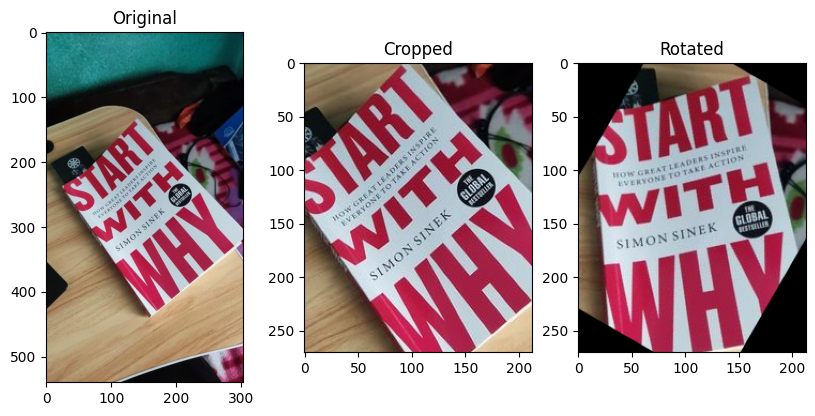

In [146]:
plt.figure(figsize=(10,10))
plt.subplot(2, 3, 1)
plt.title("Original")
plt.imshow(book)

height, width = book.shape[:2]

start_row, start_col = int(height * .25), int(width * .15)
end_row, end_col = int(height * .75), int(width * .85)

cropped = book[start_row:end_row , start_col:end_col]
plt.subplot(2, 3, 2)
plt.title("Cropped")
plt.imshow(cropped)


height, width = cropped.shape[:2]
rotation_matrix = cv2.getRotationMatrix2D((width/2, height/2),angle=-30,scale=1)
rotated_image = cv2.warpAffine(cropped, rotation_matrix, (width, height))
plt.subplot(2,3,3)
plt.title("Rotated")
plt.imshow(rotated_image)

## Scaling, Interpolations, And Re-Sizing

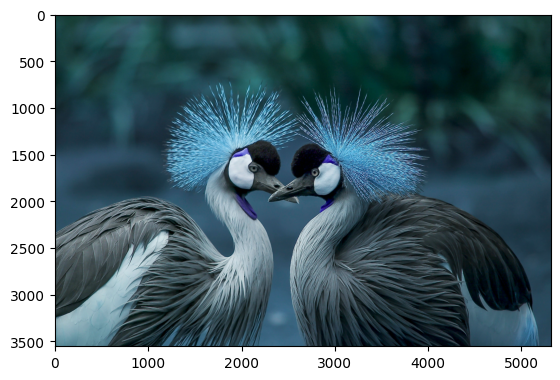

In [147]:
plt.imshow(birds)

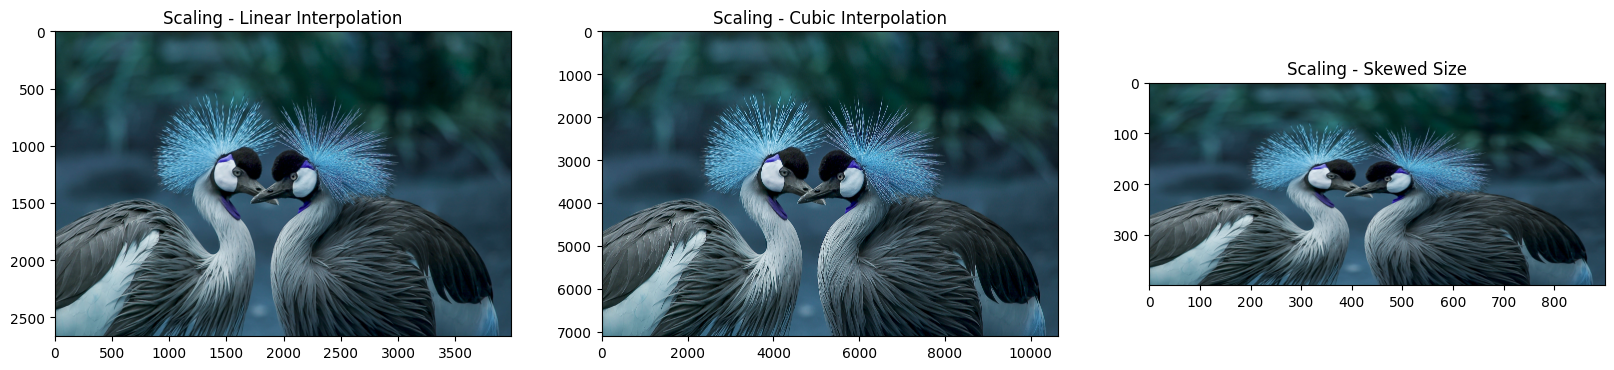

In [148]:
plt.figure(figsize=(20, 20))

image_scaled = cv2.resize(birds, None, fx=0.75, fy=0.75)
plt.subplot(2, 3, 1)
plt.title("Scaling - Linear Interpolation")
plt.imshow(image_scaled)

img_scaled = cv2.resize(birds, None, fx=2, fy=2, interpolation = cv2.INTER_CUBIC)
plt.subplot(2, 3, 2)
plt.title("Scaling - Cubic Interpolation")
plt.imshow(img_scaled)

img_scaled = cv2.resize(birds, (900, 400), interpolation = cv2.INTER_AREA)
plt.subplot(2, 3, 3)
plt.title("Scaling - Skewed Size")
plt.imshow(img_scaled)

# Thresholding, Adaptive Thresholding, And Binarization

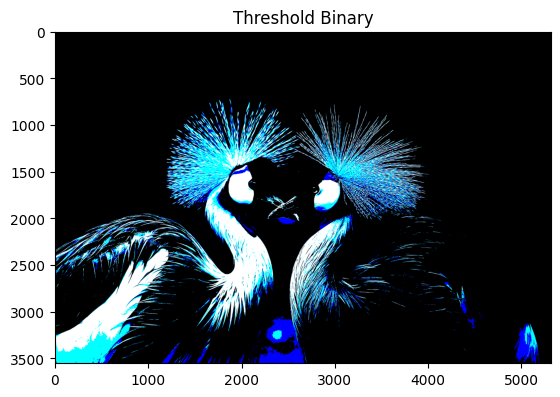

In [151]:
ret,thresh1 = cv2.threshold(birds, 127, 255, cv2.THRESH_BINARY)
plt.title("Threshold Binary")
plt.imshow(thresh1)

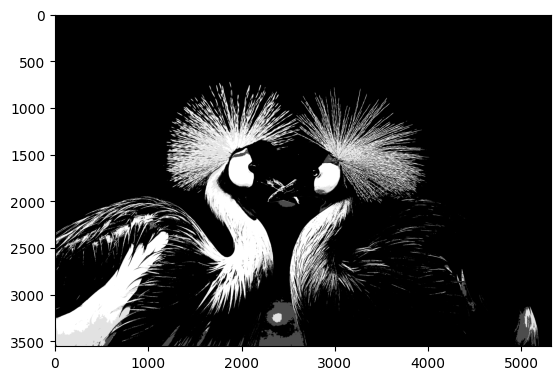

In [152]:
thresh1_gray = cv2.cvtColor(thresh1, cv2.COLOR_BGR2GRAY)
plt.imshow(thresh1_gray, cmap='gray')

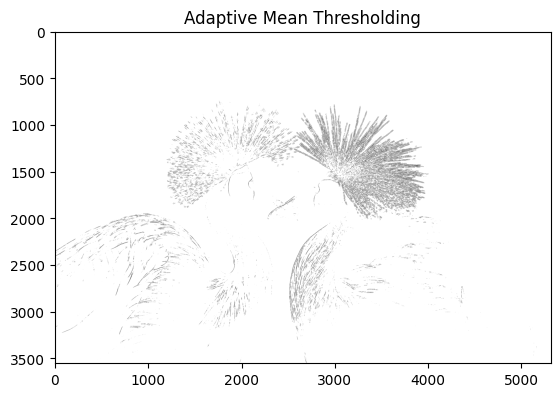

In [163]:
birds_gray = cv2.cvtColor(birds, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale
birds_blurred = cv2.GaussianBlur(birds_gray, (3, 3), 0)  # Apply Gaussian blur

# Apply adaptive thresholding
thresh = cv2.adaptiveThreshold(birds_blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 5)

# Visualize the result
plt.title("Adaptive Mean Thresholding")
plt.imshow(thresh, cmap='gray')
plt.show()

Threshold used: 111.0


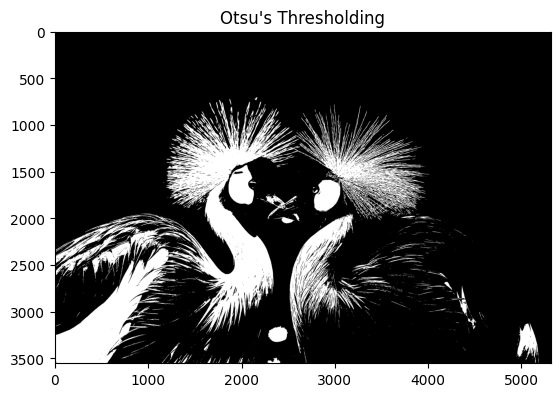

In [173]:
birds_gray = cv2.cvtColor(birds, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale

# Apply Otsu's thresholding
ret, th2 = cv2.threshold(birds_gray,0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Print the threshold value computed by Otsu's method
print("Threshold used:",ret)

# Visualize the result
plt.title("Otsu's Thresholding")
plt.imshow(th2, cmap='gray')
plt.show()

Threshold used: 109.0


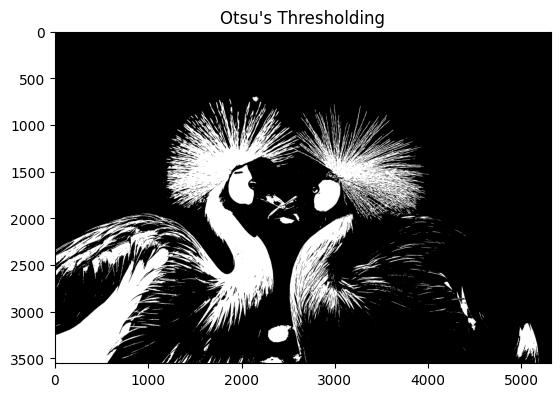

In [174]:
birds_gray = cv2.cvtColor(birds, cv2.COLOR_BGR2GRAY)  # Convert image to grayscale
blur = cv2.GaussianBlur(birds_gray, (5,5), 0) # Blur image with kernel of 5x5 with std=0

# Apply Otsu's thresholding
ret, th2 = cv2.threshold(blur,0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Print the threshold value computed by Otsu's method
print("Threshold used:",ret)

# Visualize the result
plt.title("Otsu's Thresholding")
plt.imshow(th2, cmap='gray')
plt.show()

## Sharpening

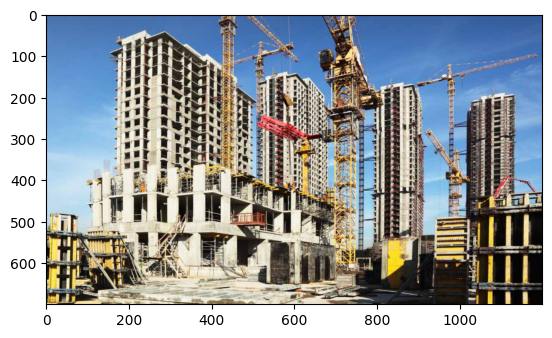

In [178]:
image = cv2.imread('/content/building.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

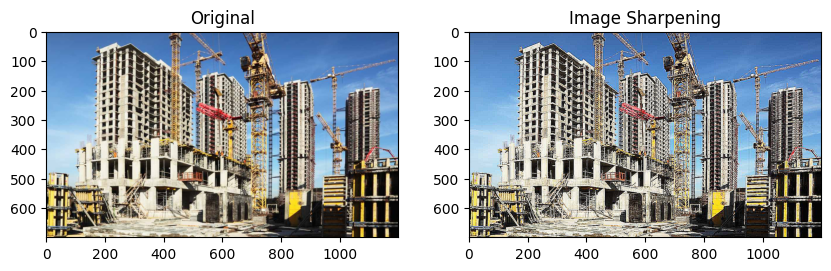

In [185]:
plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
plt.title("Original")
plt.imshow(image)

kernel_sharpening = np.array([[-1,-1,-1],
                              [-1,9,-1],
                              [-1,-1,-1]])
sharpened = cv2.filter2D(image, -1, kernel_sharpening)
plt.subplot(1,2,2)
plt.title("Image Sharpening")
plt.imshow(sharpened)
plt.show()

## Blurring

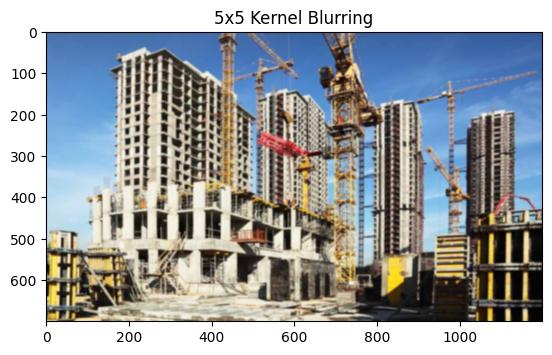

In [187]:
kernel_5x5 = np.ones((5, 5), np.float32) / 25
blurred = cv2.filter2D(image, -1, kernel_5x5)
plt.title("5x5 Kernel Blurring")
plt.imshow(blurred)

## Contours